In [33]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math

#load flight data into pandas
data = pd.read_csv('FlightData_trimmed.csv')
sim_data = pd.read_csv('open_rocket_sim_data.csv')

In [34]:
data

,t,ax,ay,az,temp,P,hum,roll,pitch,yaw,gx,gy,gz,cx,cy,cz
0,0.212056,0.010910,-0.171029,1.006712,8.441104,1020.403320,34.989563,351.914790,359.637139,203.370239,-0.003048,-0.016917,0.001766,-25.666397,11.584919,-5.603654
1,0.314545,0.016001,-0.157762,1.001838,8.548773,1020.390625,34.655155,352.056563,359.216782,203.440808,0.032339,-0.090667,0.024374,-28.191803,12.585178,-6.037241
2,0.436527,0.025457,-0.152455,1.017191,8.548773,1020.385742,35.714668,351.964692,358.853934,203.612191,-0.043789,-0.008156,0.048437,-29.176216,13.067909,-6.039518
3,0.558478,0.047762,-0.144736,1.000619,8.459049,1020.386963,34.463120,351.892145,358.685961,203.503782,0.027591,-0.071335,-0.041035,-29.833883,13.527579,-6.144697
4,0.685272,0.032245,-0.156073,1.020846,8.602608,1020.382080,35.357082,351.863059,358.296222,203.008471,-0.023657,0.017024,-0.019801,-30.146194,13.719485,-6.137830
5,0.807416,0.011153,-0.156314,1.024745,8.441104,1020.368896,35.340530,351.636895,358.359979,202.894680,0.019621,-0.028173,0.004647,-30.380392,13.757763,-6.398639
6,0.936322,0.022305,-0.156556,1.005250,8.476994,1020.351318,37.188057,351.752013,358.031419,203.029480,0.020384,-0.057214,0.013583,-30.193863,13.921758,-6.748477
7,1.058728,0.033942,-0.155349,1.030594,8.530828,1020.330811,34.631977,351.627447,357.792455,203.140526,-0.042094,0.071210,-0.001584,-29.914656,14.275135,-6.683706
8,1.181401,0.026184,-0.152937,1.014023,8.405214,1020.310547,34.704819,351.555774,357.804810,203.213896,0.014510,-0.045406,-0.001692,-30.213774,13.991951,-6.338748
9,1.304135,0.035397,-0.155591,1.030107,8.494939,1020.297119,36.380177,351.576333,357.521784,203.147629,-0.024650,-0.007927,-0.002328,-30.175884,13.837225,-5.844020


In [35]:
sim_data

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (cm),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
0,0.000,0.000000,0.000000,2.704200,0.000000,2.707900,0.000000e+00,0.000000,0.000000e+00,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.001373
1,0.002,0.000005,0.005408,27.650000,0.005416,27.688000,2.834400e-07,0.000000,2.834400e-07,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.001725
2,0.004,0.000072,0.060711,52.599000,0.060795,52.671000,3.748600e-06,0.000000,3.748600e-06,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.002011
3,0.006,0.000298,0.165910,77.551000,0.166140,77.657000,1.562500e-05,0.000000,1.562500e-05,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.002243
4,0.008,0.000785,0.321020,95.196000,0.321470,95.327000,4.114500e-05,0.000000,4.114500e-05,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.002470
5,0.010,0.001618,0.511430,105.540000,0.512140,105.680000,8.477200e-05,0.000000,8.477200e-05,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.002690
6,0.012,0.002851,0.722540,115.890000,0.723530,116.050000,1.494400e-04,0.000000,1.494400e-04,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.002910
7,0.014,0.004528,0.954350,126.240000,0.955660,126.420000,2.373200e-04,0.000000,2.373200e-04,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.003127
8,0.016,0.006690,1.206900,136.600000,1.208500,136.790000,3.505900e-04,0.000000,3.505900e-04,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.003350
9,0.018,0.009377,1.480100,146.960000,1.482100,147.160000,4.914100e-04,0.000000,4.914100e-04,0.00,...,7.874,48.695,87.0,0.0,NaN,14.675,1007.40,340.19,0.002,0.004162


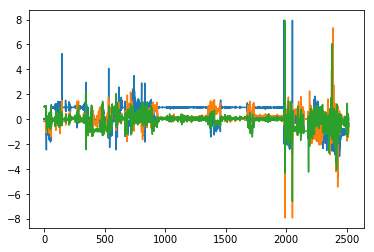

In [56]:
plt.plot(data['t'],data['ax'],data['t'],data['ay'],data['t'],data['az'])

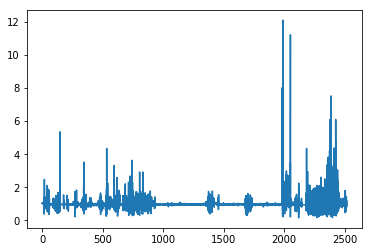

In [57]:
data['norm_accel'] = np.sqrt(data['ax']**2 +data['ay']**2 +data['az']**2 )

plt.plot(data['t'],data['norm_accel'])

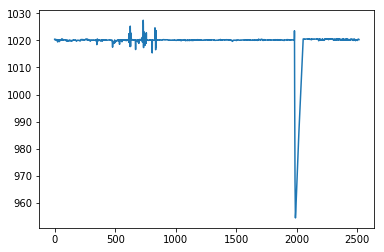

In [58]:
plt.plot(data['t'],data['P'])

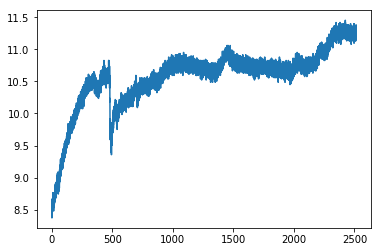

In [59]:
plt.plot(data['t'],data['temp'])

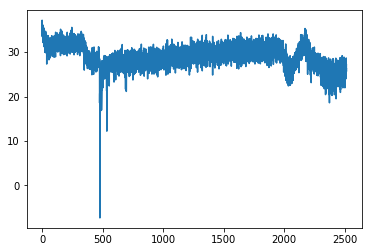

In [60]:
plt.plot(data['t'],data['hum'])

In [61]:
def pres2alt(pressure):
    '''
    Determine altitude from site pressure.

    Parameters
    ----------
    pressure : numeric
        Atmospheric pressure (Pascals)

    Returns
    -------
    altitude : numeric
        Altitude in meters above sea level

    Notes
    ------
    The following assumptions are made

    ============================   ================
    Parameter                      Value
    ============================   ================
    Base pressure                  101325 Pa
    Temperature at zero altitude   288.15 K
    Gravitational acceleration     9.80665 m/s^2
    Lapse rate                     -6.5E-3 K/m
    Gas constant for air           287.053 J/(kgK)
    Relative Humidity              0%
    ============================   ================

    References
    -----------
    [1] "A Quick Derivation relating altitude to air pressure" from
    Portland State Aerospace Society, Version 1.03, 12/22/2004.
    '''

    alt = 44331.5 - 4946.62 * pressure ** (0.190263)

    return alt


In [62]:
def convert_to_altitude(pressure_in_milibars):
    #conver pressure to pascals
    pressure = pressure_in_milibars*100;
    alt = pres2alt(pressure)
    return alt
    

In [63]:
data['alt'] = data.P.apply(convert_to_altitude)

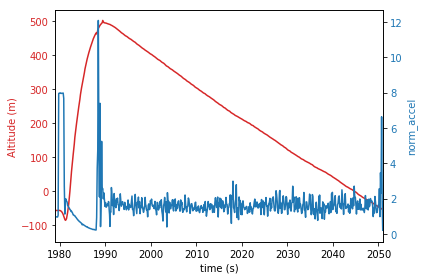

In [64]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Altitude (m)',color=color)
ax1.plot(data['t'],data['alt'],color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xlim([1979,2051])
ax2 = ax1.twinx()


color = 'tab:blue'
ax2.set_ylabel('norm_accel',color=color)  # we already handled the x-label with ax1
ax2.plot(data['t'],data['norm_accel'],color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()


In [65]:
max(data['alt'])-min(data['alt'])

618.3873651816612

In [66]:
#total flight time
2051-1979

72

(1969, 2062)

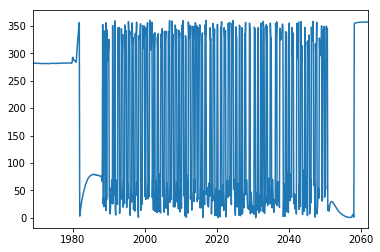

In [67]:
plt.plot(data['t'],data['pitch'])
plt.xlim([1979-10,2052+10])

In [68]:
data['roll_unwrapped'] = np.unwrap(data['roll'])
data['pitch_unwrapped'] = np.unwrap(data['pitch'])
data['yaw_unwrapped'] = np.unwrap(data['yaw'])

(1969, 2062)

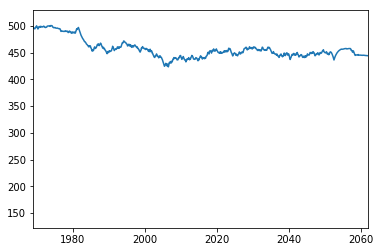

In [69]:
plt.plot(data['t'],data['roll_unwrapped'])
plt.xlim([1979-10,2052+10])

(1979, 2052)

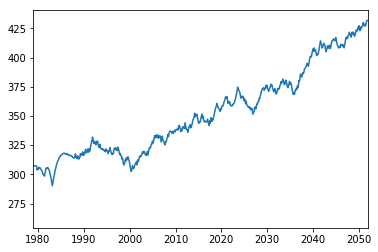

In [70]:
plt.plot(data['t'],data['pitch_unwrapped'])
plt.xlim([1979,2052])

(1969, 2062)

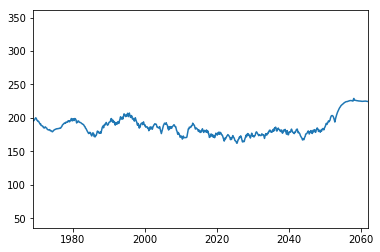

In [71]:
plt.plot(data['t'],data['yaw_unwrapped'])
plt.xlim([1979-10,2052+10])

(1969, 2062)

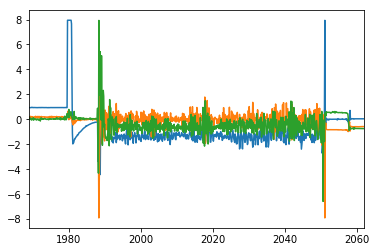

In [72]:
plt.plot(data['t'],data['ax'],data['t'],data['ay'],data['t'],data['az'])
plt.xlim([1979-10,2052+10])

(1975, 1990)

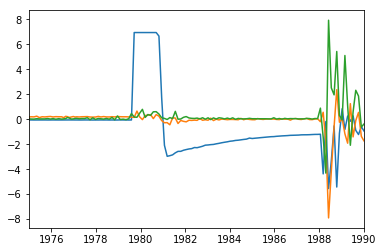

In [73]:
plt.plot(data['t'],data['ax']-1,data['t'],data['ay'],data['t'],data['az'])
plt.xlim([1975,1990])


(1975, 1990)

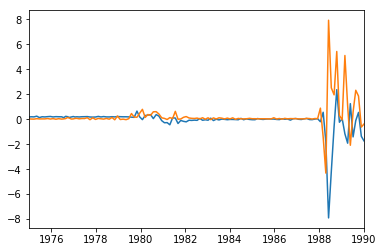

In [74]:
plt.plot(data['t'],data['ay'],data['t'],data['az'])
plt.xlim([1975,1990])

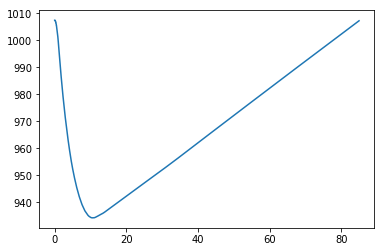

In [75]:
plt.plot(sim_data['# Time (s)'],sim_data['Air pressure (mbar)'])

In [76]:
max(sim_data['# Time (s)'])

84.90899999999999

(1979, 2063.909)

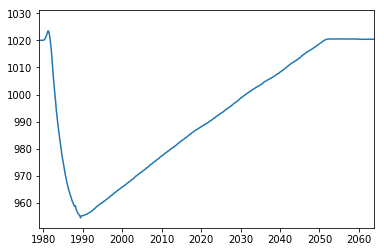

In [77]:
plt.plot(data['t'],data['P'])
plt.xlim([1979,1979+84.90899999999999])

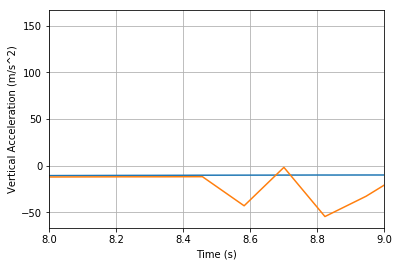

In [132]:
plt.plot(sim_data['# Time (s)'],sim_data['Vertical acceleration (m/s²)'])
plt.plot(data['t']-1979.6,(data['ax']-1)*9.81)
plt.xlim([8,9])
plt.xlabel('Time (s)')
plt.ylabel('Vertical Acceleration (m/s^2)')
plt.grid(True)
plt.savefig('Sim vs Measured Acceleration Plot.eps',format='eps')


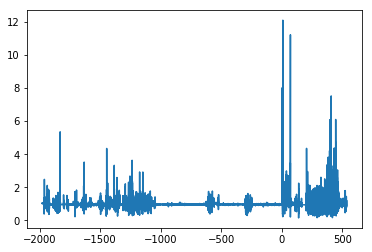

In [81]:
plt.plot(data['t']-1979,data['norm_accel'])

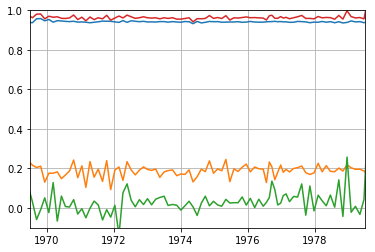

In [111]:
plt.plot(data['t'],data['ax'],data['t'],data['ay'],data['t'],data['az'],data['t'],data['norm_accel'])
plt.xlim([1979.5-10,1979.5])
plt.ylim([-0.1,1])
plt.grid(True)

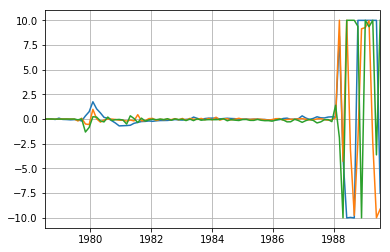

In [118]:
plt.plot(data['t'],data['gx'],data['t'],data['gy'],data['t'],data['gz'])
plt.xlim([1979.5-1,1979.5+10])

plt.grid(True)

(1979, 2050)

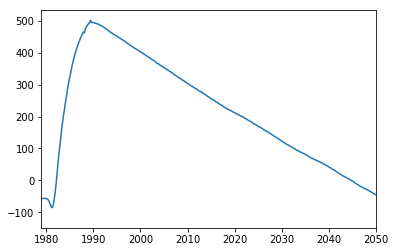

In [122]:
plt.plot(data['t'],data['alt'])
plt.xlim([1979,2050])

In [127]:
data['alt_derivative'] = data.alt.diff()/data.t.diff()

(0, 15)

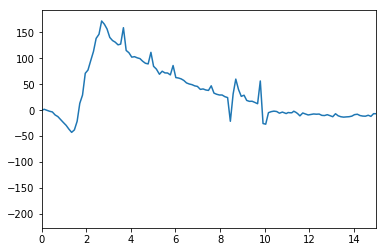

In [137]:
plt.plot(data['t']-1979.6,data['alt_derivative'])
plt.xlim([0,15])


In [162]:
print(data.loc[16250:16500,['t','alt']])

                 t         alt
16250  1974.367693  -56.678032
16251  1974.490760  -56.768986
16252  1974.613474  -56.756865
16253  1974.733992  -56.773034
16254  1974.857084  -56.843778
16255  1974.980089  -56.882176
16256  1975.102522  -56.849838
16257  1975.225410  -56.817500
16258  1975.348208  -56.859947
16259  1975.467383  -56.918561
16260  1975.589980  -56.888244
16261  1975.713009  -56.841758
16262  1975.835831  -56.746756
16263  1975.958804  -56.724519
16264  1976.077946  -56.669952
16265  1976.208939  -56.570908
16266  1976.331830  -56.463775
16267  1976.464300  -56.393029
16268  1976.558259  -56.395049
16269  1976.645974  -56.344520
16270  1976.722326  -56.328351
16271  1976.809610  -56.326331
16272  1976.897390  -56.243454
16273  1976.985097  -56.283882
16274  1977.062192  -56.324310
16275  1977.146133  -56.332391
16276  1977.249025  -56.330371
16277  1977.372000  -56.306112
16278  1977.491333  -56.304092
16279  1977.614082  -56.316221
...            ...         ...
16471  2

In [165]:
print(data.loc[16250+2*50+1:16250+3*50,['t','alt']])

                 t         alt
16351  1986.461969  412.457360
16352  1986.581974  417.957198
16353  1986.713362  423.224983
16354  1986.836025  428.251887
16355  1986.958984  433.039674
16356  1987.078077  437.581651
16357  1987.200915  443.353675
16358  1987.323752  447.399410
16359  1987.446628  451.168654
16360  1987.569636  454.771523
16361  1987.688692  458.256696
16362  1987.811866  461.468942
16363  1987.934684  464.454763
16364  1988.057685  461.828045
16365  1988.182212  465.723734
16366  1988.301044  472.843067
16367  1988.423626  477.734610
16368  1988.546423  481.010412
16369  1988.671320  484.615211
16370  1988.790536  486.864325
16371  1988.909810  488.898747
16372  1989.032814  491.018808
16373  1989.155553  492.855837
16374  1989.278681  494.394761
16375  1989.399450  501.194781
16376  1989.522304  498.038365
16377  1989.641901  494.816832
16378  1989.765380  494.230627
16379  1989.891426  493.881050
16380  1990.010146  493.667899
16381  1990.133390  493.356708
16382  1